## 卷积神经网络相关程序


#### 1.引言：运用卷积核操作进行图像处理案例

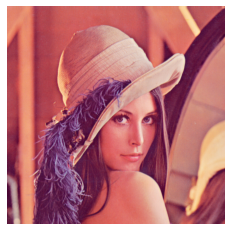

In [7]:
# 引入PIL读取图片，分离RGB三通道
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 读取图片
img = Image.open('lena.png')
plt.axis("off")
plt.imshow(img)

灰度图像：
- 0表示黑
- 255表示白
- 其他数字表示不同的灰度。
- 转换公式：L = R * 299/1000 + G * 587/1000+ B * 114/1000。

(-0.5, 511.5, 511.5, -0.5)

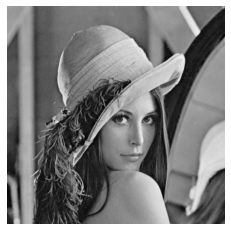

In [8]:
gray = img.convert('L')
plt.figure()
plt.imshow(gray, cmap='gray')
plt.axis('off')

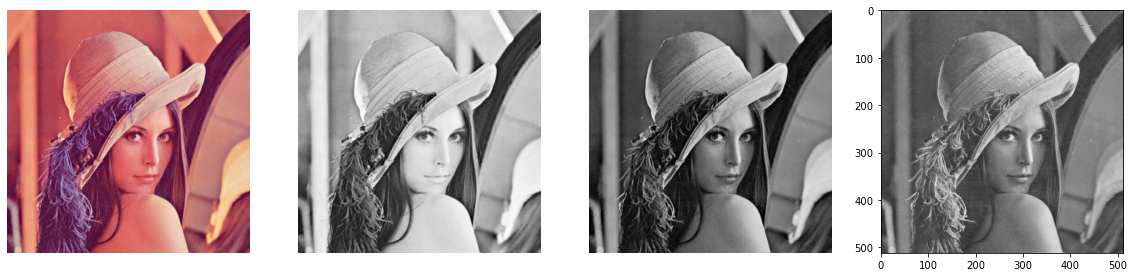

In [9]:
r, g, b = img.split()

plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.axis("off")
plt.imshow(img)

plt.subplot(1,4,2)
plt.axis('off')
plt.imshow(r,cmap='gray')

plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(g,cmap='gray')

plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(b,cmap='gray')

In [10]:
import numpy as np
# 定义卷积函数
def convolution(k, data):
    n,m = data.shape
    img_new = []
    for i in range(n-2):
        line = []
        for j in range(m-2):
            a = data[i:i+3,j:j+3]
            line.append(np.sum(np.multiply(k, a)))
        img_new.append(line)
    return np.array(img_new)

# 对某一通道进行卷积
def transform(channel,k):
    data=np.array(channel)
    n,m=data.shape
    img_new=convolution(k,data)
    return img_new

(512, 512, 3)


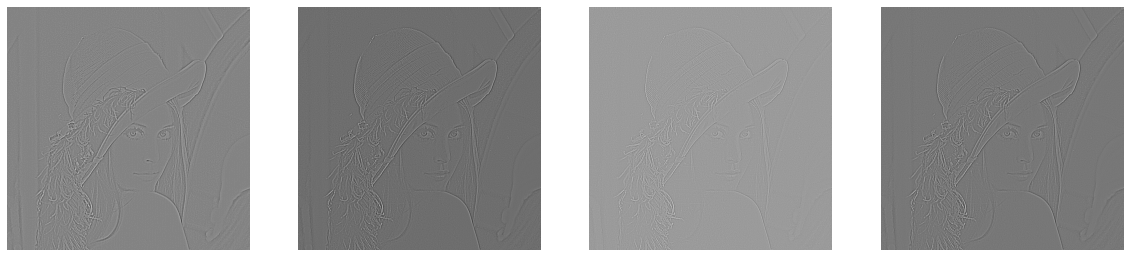

In [11]:
img_array=np.array(img)
print(img_array.shape)

# 定义卷积核（提取边缘特征）
k = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

rt=transform(r,k)
gt=transform(g,k)
bt=transform(b,k)

#卷积结果可视化
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.axis('off')
plt.imshow(rt, cmap='gray')

plt.subplot(1,4,2)
plt.axis('off')
plt.imshow(gt, cmap='gray')

plt.subplot(1,4,3)
plt.axis('off')
plt.imshow(bt, cmap='gray')

plt.subplot(1,4,4)
plt.axis('off')
plt.imshow(rt+gt+bt,cmap='gray')

#### 2.卷积神经网络和传统神经网络的参数对比
通过实验可以发现一个*4层的卷积神经网络*参数量比一个*3层的全连接神经网络*还要少很多参数，而且这个例子中***卷积神经网络最后两层也是全连接层***。

In [6]:
import tensorflow as tf
# 查看参数数量
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

In [7]:
#导入包
from keras import layers
from keras import models

#构建卷积神经网络模型
model=models.Sequential()
# 32个卷积核 所以参数量是（3*3+1）*32，同时32个卷积核，stride为1且不padding情况下，会变成26*26*32的厚度
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

#在卷积神经网络模型上添加分类器
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dense (Dense)               (None, 11, 11, 256)       16640     
                                                                 
 dense_1 (Dense)             (None, 11, 11, 10)        2570      
                                                                 
Total params: 38,026
Trainable params: 38,026
Non-trainable params: 0
____________________________________________________

In [8]:
network=models.Sequential()#模型选择sequential
network.add(layers.Dense(256,activation='relu',input_shape=(28*28,)))#256个隐藏节点，激活函数采用relu函数，输入784像素
network.add(layers.Dense(256,activation='relu'))#256个隐藏节点，激活函数采用relu函数，输入784像素
network.add(layers.Dense(10,activation='softmax'))#十个类别，分类函数采用softmax

#编译步骤
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


#### 3.VGG16
##### 3.1 用opencv处理大小不一的数据图片，统一将图片变为224*224

In [ ]:
import cv2 as cv
import os
import numpy as np


#把cut_img裁成和norm_img形状相同的图片
def cut_photo(H, W, cut_img):  # 设置输出固定形状的图片
    H, W = H, W
    h, w, *c = cut_img.shape
    size = 1 if [] == c else 3  # c是空c=1,其它c=3
    if H / h < W / w:
        img2 = cv.resize(cut_img, (int(w * (H / h)), H), interpolation=cv.INTER_LINEAR)
        _, w, *_ = img2.shape
        left = int((W - w) / 2)
        right = int(np.ceil((W - w) / 2))
        top, bottom = 0, 0
        img2_cut = cv.copyMakeBorder(img2, top, bottom, left, right, cv.BORDER_CONSTANT, value=np.zeros(size))
    else:
        img2 = cv.resize(cut_img, (W, int(h * (W / w))), interpolation=cv.INTER_LINEAR)
        h, _, *_ = img2.shape
        top = int((H - h) / 2)  # 距各边界宽度
        bottom = int(np.ceil((H - h) / 2))
        left, right = 0, 0
        img2_cut = cv.copyMakeBorder(img2, top, bottom, left, right, cv.BORDER_CONSTANT, value=np.zeros(size))
    return img2_cut


def read_photo(H, W, img_path, save_path):
    if not os.path.exists(save_path):  # 如果path存在，返回True；如果path不存在，返回False。
        os.mkdir(save_path)  # 创建目录
    for i, name in enumerate(os.listdir(img_path)):
        filename = os.path.join(img_path, name)
        img = cv.imdecode(np.fromfile(filename, np.uint8), -1)
        cut_img = cut_photo(H, W, img)
        cv.imwrite(os.path.join(save_path, "{}.jpg".format(str(i))), cut_img)


img_path = r"D:/Download/BaiduNetdiskDownload/flower_photos/tulips"
save_path = r"./cut_img/tulips"
read_photo(224, 224, img_path, save_path)

#### 3.2 给图片合适的命名决定其类别

In [10]:
import os
path = "cut_img/tulips"
filelist = os.listdir(path)
count=0
for file in filelist:
    print(file)
for file in filelist:   
    Olddir=os.path.join(path,file)  
    if os.path.isdir(Olddir):  
        continue
    filename=os.path.splitext(file)[0]   
    filetype=os.path.splitext(file)[1]  
    Newdir=os.path.join(path,"5_"+str(count).zfill(4)+filetype)  
    os.rename(Olddir,Newdir)
 
    count+=1

5_0000.jpg
5_0001.jpg
5_0002.jpg
5_0003.jpg
5_0004.jpg
5_0005.jpg
5_0006.jpg
5_0007.jpg
5_0008.jpg
5_0009.jpg
5_0010.jpg
5_0011.jpg
5_0012.jpg
5_0013.jpg
5_0014.jpg
5_0015.jpg
5_0016.jpg
5_0017.jpg
5_0018.jpg
5_0019.jpg
5_0020.jpg
5_0021.jpg
5_0022.jpg
5_0023.jpg
5_0024.jpg
5_0025.jpg
5_0026.jpg
5_0027.jpg
5_0028.jpg
5_0029.jpg
5_0030.jpg
5_0031.jpg
5_0032.jpg
5_0033.jpg
5_0034.jpg
5_0035.jpg
5_0036.jpg
5_0037.jpg
5_0038.jpg
5_0039.jpg
5_0040.jpg
5_0041.jpg
5_0042.jpg
5_0043.jpg
5_0044.jpg
5_0045.jpg
5_0046.jpg
5_0047.jpg
5_0048.jpg
5_0049.jpg
5_0050.jpg
5_0051.jpg
5_0052.jpg
5_0053.jpg
5_0054.jpg
5_0055.jpg
5_0056.jpg
5_0057.jpg
5_0058.jpg
5_0059.jpg
5_0060.jpg
5_0061.jpg
5_0062.jpg
5_0063.jpg
5_0064.jpg
5_0065.jpg
5_0066.jpg
5_0067.jpg
5_0068.jpg
5_0069.jpg
5_0070.jpg
5_0071.jpg
5_0072.jpg
5_0073.jpg
5_0074.jpg
5_0075.jpg
5_0076.jpg
5_0077.jpg
5_0078.jpg
5_0079.jpg
5_0080.jpg
5_0081.jpg
5_0082.jpg
5_0083.jpg
5_0084.jpg
5_0085.jpg
5_0086.jpg
5_0087.jpg
5_0088.jpg
5_0089.jpg
5_0090.jpg

#### 3.3 将各个照片按照一定比例分为训练集和测试集两个文件夹

In [15]:
# 将一个文件夹下图片按比例分在三个文件夹下
import os
import random
import shutil
from shutil import copy2
datadir_normal = "cut_img/tulips"

all_data = os.listdir(datadir_normal)#（图片文件夹）
num_all_data = len(all_data)
print( "num_all_data: " + str(num_all_data) )
index_list = list(range(num_all_data))
#print(index_list)
random.shuffle(index_list)
num = 0

trainDir = "./cut_img/train"#（将训练集放在这个文件夹下）
if not os.path.exists(trainDir):
    os.mkdir(trainDir)
        
testDir = './cut_img/test'#（将测试集放在这个文件夹下）        
if not os.path.exists(testDir):
    os.mkdir(testDir)
        
for i in index_list:
    fileName = os.path.join(datadir_normal, all_data[i])
    if num < num_all_data*0.8:
        copy2(fileName, trainDir)
    else:
        copy2(fileName, testDir)
    num += 1

num_all_data: 799


##### 3.4 生成图片相应的标签txt

In [26]:
import os
path = "cut_img/train" #相应图片所在文件路径
file_list = []
write_file_name = 'cut_img/train/train.txt' #生成的txt文件路径
filelist = os.listdir(path) #该文件夹下所有的文件（包括文件夹）
count=0
write_file = open(write_file_name, "w") #以只写方式打开write_file_name文件
for file in os.listdir(path):   #遍历所有文件

    filename=os.path.splitext(file)[0]  #文件名
    filename_first = os.path.splitext(file)[0][0]
    filetype=os.path.splitext(file)[1]   #文件扩展名
    Newdir = os.path.join(file + ' ' + filename_first )
    file_list.append(Newdir)
    count+=1
number_of_lines = len(file_list)#列表中元素个数
print('file_list1:',file_list)
file_list.sort(key=lambda item:len(str(item)), reverse=False)#排序
print('file_list:',file_list)
print(type(file_list))
for current_line in range(number_of_lines):
    write_file.write(file_list[current_line] + '\n')  # 关闭文件

file_list1: ['1_0000.jpg 1', '1_0002.jpg 1', '1_0003.jpg 1', '1_0004.jpg 1', '1_0005.jpg 1', '1_0006.jpg 1', '1_0008.jpg 1', '1_0009.jpg 1', '1_0010.jpg 1', '1_0011.jpg 1', '1_0013.jpg 1', '1_0014.jpg 1', '1_0015.jpg 1', '1_0017.jpg 1', '1_0018.jpg 1', '1_0019.jpg 1', '1_0020.jpg 1', '1_0021.jpg 1', '1_0022.jpg 1', '1_0023.jpg 1', '1_0024.jpg 1', '1_0025.jpg 1', '1_0026.jpg 1', '1_0027.jpg 1', '1_0028.jpg 1', '1_0029.jpg 1', '1_0030.jpg 1', '1_0031.jpg 1', '1_0032.jpg 1', '1_0033.jpg 1', '1_0034.jpg 1', '1_0035.jpg 1', '1_0036.jpg 1', '1_0038.jpg 1', '1_0039.jpg 1', '1_0040.jpg 1', '1_0041.jpg 1', '1_0042.jpg 1', '1_0043.jpg 1', '1_0044.jpg 1', '1_0045.jpg 1', '1_0046.jpg 1', '1_0047.jpg 1', '1_0049.jpg 1', '1_0052.jpg 1', '1_0053.jpg 1', '1_0054.jpg 1', '1_0056.jpg 1', '1_0057.jpg 1', '1_0061.jpg 1', '1_0062.jpg 1', '1_0064.jpg 1', '1_0065.jpg 1', '1_0067.jpg 1', '1_0070.jpg 1', '1_0071.jpg 1', '1_0072.jpg 1', '1_0073.jpg 1', '1_0074.jpg 1', '1_0075.jpg 1', '1_0076.jpg 1', '1_0077.jpg

#### 3.5 划分自制数据集为可以传输到网络的测试集和训练集，并且打乱了顺序并进行了归一化

In [64]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os

train_path = './cut_img/train/'  #存放训练集图片路径
train_txt = 'cut_img/train/train.txt'       #存放的训练集txt标签文件
x_train_savepath = 'x_train.npy'
y_train_savepath = 'y_train.npy'


test_path = './cut_img/test/'    #存放测试集图片路径
test_txt = 'cut_img/test/test.txt'      #存放的测试集txt标签文件
x_test_savepath = 'x_test.npy'
y_test_savepath = 'y_test.npy'


def generateds(path, txt):
    f = open(txt, 'r')  # 以只读形式打开txt文件
    contents = f.readlines()  # 读取文件中所有行
    f.close()  # 关闭txt文件
    contents=np.array(contents)
    np.random.shuffle(contents)

    x, y_ = [], []  # 建立空列表
    for content in contents:  # 逐行取出
        value = content.split()  # 以空格分开，图片路径为value[0] , 标签为value[1] , 存入列表
        img_path = path + value[0]  # 拼出图片路径和文件名
        img = Image.open(img_path)  # 读入图片
        # img = np.array(img.convert('L'))  # 图片变为8位宽灰度值的np.array格式
        img = np.array(img) / 255.  # 数据归一化 （实现预处理）
        x.append(img)  # 归一化后的数据，贴到列表x
        y_.append(value[1])  # 标签贴到列表y_
        print('loading : ' + content)  # 打印状态提示

    x = np.array(x)  # 变为np.array格式
    y_ = np.array(y_)  # 变为np.array格式
    y_ = y_.astype(np.int64)  # 变为64位整型
    return x, y_  # 返回输入特征x，返回标签y_


if os.path.exists(x_train_savepath) and os.path.exists(y_train_savepath) and os.path.exists(
        x_test_savepath) and os.path.exists(y_test_savepath):
    print('-------------Load Datasets-----------------')
    x_train_save = np.load(x_train_savepath)
    y_train = np.load(y_train_savepath)
    x_test_save = np.load(x_test_savepath)
    y_test = np.load(y_test_savepath)
    x_train = np.reshape(x_train_save, (len(x_train_save), 224, 224))
    x_test = np.reshape(x_test_save, (len(x_test_save), 224, 224))
else:
    print('-------------Generate Datasets-----------------')
    x_train, y_train = generateds(train_path, train_txt)
    x_test, y_test = generateds(test_path, test_txt)

    print('-------------Save Datasets-----------------')
    x_train_save = np.reshape(x_train, (len(x_train), -1))
    x_test_save = np.reshape(x_test, (len(x_test), -1))
    np.save(x_train_savepath, x_train_save)
    np.save(y_train_savepath, y_train)
    np.save(x_test_savepath, x_test_save)
    np.save(y_test_savepath, y_test)


-------------Generate Datasets-----------------
loading : 5_0501.jpg 5

loading : 2_0094.jpg 2

loading : 4_0450.jpg 4

loading : 2_0366.jpg 2

loading : 1_0102.jpg 1

loading : 4_0608.jpg 4

loading : 1_0062.jpg 1

loading : 4_0260.jpg 4

loading : 1_0610.jpg 1

loading : 2_0255.jpg 2

loading : 3_0175.jpg 3

loading : 1_0238.jpg 1

loading : 3_0604.jpg 3

loading : 3_0630.jpg 3

loading : 1_0339.jpg 1

loading : 2_0381.jpg 2

loading : 2_0801.jpg 2

loading : 4_0254.jpg 4

loading : 3_0227.jpg 3

loading : 4_0530.jpg 4

loading : 3_0551.jpg 3

loading : 3_0441.jpg 3

loading : 1_0559.jpg 1

loading : 3_0602.jpg 3

loading : 1_0455.jpg 1

loading : 4_0553.jpg 4

loading : 3_0014.jpg 3

loading : 1_0184.jpg 1

loading : 2_0284.jpg 2

loading : 2_0036.jpg 2

loading : 1_0432.jpg 1

loading : 2_0263.jpg 2

loading : 2_0086.jpg 2

loading : 2_0329.jpg 2

loading : 1_0287.jpg 1

loading : 5_0706.jpg 5

loading : 4_0053.jpg 4

loading : 2_0751.jpg 2

loading : 3_0091.jpg 3

loading : 1_0092

In [ ]:
# model = tf.keras.models.Sequential( [tf.keras . layers.Flatten () ,tf.keras.layers.Dense (128,activation='relu ' ) ,tf.keras. layers. Dense (10, activation='softmax ' )])
# model.compile (optimizer="adam" ,loss=tf.keras.losses.sparsecategoricalCrossentropy(from_logits=False) ,metrics=[ " sparse_categorical_accuracy '])
# model.fit(x_train，y_train，batch_size=32，epochs=5，validation data=(x_test，y_test)， validation_frecg=1)
# model .summary ()

0.1568627450980392


#### 3.5 VGG 16

In [1]:
import numpy as np
x_test_cnn=np.load('x_test.npy')
y_test_cnn=np.load('y_test.npy')
x_train_cnn=np.load('x_train.npy')
y_train_cnn=np.load('y_train.npy')

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

x_train_array = x_train_cnn.reshape((-1,224,224,3))
x_test_array = x_test_cnn.reshape((-1,224,224,3))
print(x_train_array.shape, ' ', y_train_cnn.shape,type(x_train_array))
print(x_test_array.shape, ' ', y_test_cnn.shape,type(x_test_array))

(2929, 224, 224, 3)   (2929,) <class 'numpy.ndarray'>
(731, 224, 224, 3)   (731,) <class 'numpy.ndarray'>


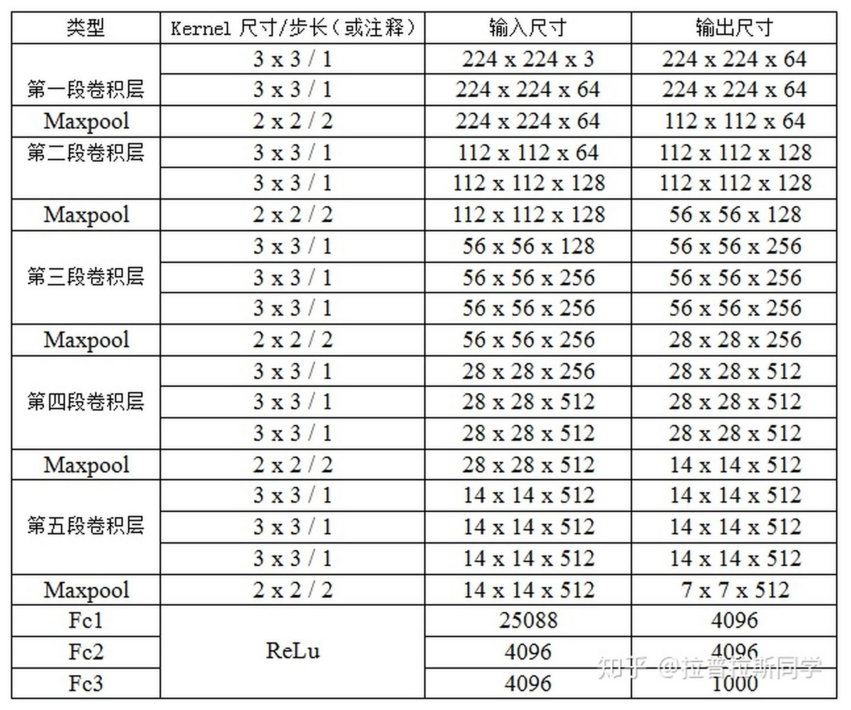

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('42.jpg')
plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(img)

In [17]:
x_shape  = x_train_array.shape
vgg16 = keras.Sequential(
[
    # Block One
    # 传入（224,224,3）作为输入，filter:卷积器个数为64，padding=same才能输出224*224*64
    layers.Conv2D(input_shape=((x_shape[1], x_shape[2], x_shape[3])),
                 filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),

    # Block Two
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),

    # Block Three
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),

    # Block Four
    layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),

    # Block Five
    layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(10, activation='softmax')
])
vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [2]:
vgg16.compile(  #使用model.compile()方法来配置训练方法
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1), #使用SGD优化器，学习率为0.1
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), #配置损失函数
    metrics = ['sparse_categorical_accuracy'] #标注网络评价指标
)

vgg16.fit(  #使用model.fit()方法来执行训练过程，
    x_train_array, y_train_cnn-1, #告知训练集的输入以及标签，
    batch_size = 32, #每一批batch的大小为32，
    epochs = 1, #迭代次数epochs为1
    validation_split=0.2 #训练集的一定比例数据作为验证集
)

NameError: name 'vgg16' is not defined